# Preprocess survey data

In [ ]:
#!pip install pymysql
#!pip install kmodes

In [ ]:
# import required packages
import os
import pickle
import datetime

import numpy as np
import pandas as pd
import pymysql

import seaborn as sns
import matplotlib.pyplot as plt

from kmodes.kmodes import KModes

In [ ]:
data = pd.read_csv('/Users/michelle/iCloud/working/survey.csv')
data.dropna(subset=['id_new'], inplace=True)
dropped = ['no', 'id', 'id_guro', 'SERIAL', 'born']
data.drop(dropped, axis=1, inplace=True)

In [ ]:
data

,id_new,GP,sub_gp,age,sex,type1,type2,type3,pa1,pa2,...,dq7_1,dq7_2,dq7_3,dq7_4,dq7_5,dq7_6,dq7_7,DISE1,DISE2,DISE3
0,125321,광양,NaN,85,여,NaN,NaN,NaN,NaN,NaN,...,NaN,아침 식후,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,125359,광양,NaN,79,여,NaN,NaN,NaN,NaN,NaN,...,NaN,아침 식후,NaN,NaN,NaN,저녁 식후,NaN,NaN,NaN,NaN
3,126917,구로,구로어르신돌봄통합센터,83,여,차상위,독거,노인돌봄기본서비스,예,예,...,NaN,아침 식후,NaN,NaN,NaN,저녁 식후,NaN,NaN,NaN,NaN
4,125368,광양,NaN,81,여,NaN,NaN,NaN,NaN,NaN,...,아침 식전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,127252,구로,온수어르신복지관,75,남,차상위,독거,없음,아니오,아니오,...,NaN,아침 식후,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,126773,구로,궁동종합사회복지관,77,여,차상위,독거,없음,아니오,아니오,...,NaN,아침 식후,NaN,점심 식후,NaN,저녁 식후,취침 전,NaN,NaN,NaN
596,125462,광양,NaN,77,여,NaN,NaN,NaN,NaN,NaN,...,아침 식전,아침 식후,점심 식전,점심 식후,저녁 식전,저녁 식후,NaN,NaN,NaN,NaN
597,126854,구로,구로어르신돌봄통합센터,83,여,차상위,독거,노인돌봄기본서비스,예,예,...,아침 식전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,127026,구로,온수어르신복지관,75,남,기초생활수급,노인부부,NaN,예,아니오,...,NaN,아침 식후,NaN,점심 식후,NaN,저녁 식후,NaN,NaN,NaN,NaN


In [ ]:
s1 = data.iloc[:, :8]
survey1 = data.iloc[:, 34:104]
survey = pd.concat([s1, survey1], axis=1)
drop = list(survey.iloc[:, 23:35].columns) + list(survey.iloc[:, 58:70].columns)
survey.drop(drop, axis=1, inplace=True)

In [ ]:
survey

,id_new,GP,sub_gp,age,sex,type1,type2,type3,sgd1_P,sgd2,...,P_sgd14,P_sgd15,p_d1,p_d2,p_d3,p_d4,p_d5,p_d6,P_D7,P_D8
0,125321,광양,NaN,85,여,NaN,NaN,NaN,아니오,예,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,125359,광양,NaN,79,여,NaN,NaN,NaN,예,예,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,126917,구로,구로어르신돌봄통합센터,83,여,차상위,독거,노인돌봄기본서비스,예,예,...,예,아니오,때에 따라,때에 따라,가끔 약 먹는 것을 잊어 먹을 때가 있음,가끔 식사시간 놓침,때에 따라,일정 하지 않음,때에 따라,2.0
4,125368,광양,NaN,81,여,NaN,NaN,NaN,아니오,예,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,127252,구로,온수어르신복지관,75,남,차상위,독거,없음,예,아니오,...,아니오,아니오,일정 하지 않음,매일 규칙적,매일 정확한 시간에 약을 복용하고 있음,매일 규칙적 세끼 식사하고 있음,때에 따라,때에 따라,일정 하지 않음,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,126773,구로,궁동종합사회복지관,77,여,차상위,독거,없음,예,예,...,예,예,일정 하지 않음,매일 규칙적,매일 정확한 시간에 약을 복용하고 있음,가끔 식사시간 놓침,일정 하지 않음,때에 따라,일정 하지 않음,2.0
596,125462,광양,NaN,77,여,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,126854,구로,구로어르신돌봄통합센터,83,여,차상위,독거,노인돌봄기본서비스,예,예,...,아니오,아니오,매일 규칙적,매일 규칙적,매일 정확한 시간에 약을 복용하고 있음,매일 규칙적 세끼 식사하고 있음,매일 규칙적,매일 규칙적,매일 규칙적,3.0
598,127026,구로,온수어르신복지관,75,남,기초생활수급,노인부부,NaN,예,예,...,아니오,아니오,때에 따라,매일 규칙적,매일 정확한 시간에 약을 복용하고 있음,매일 규칙적 세끼 식사하고 있음,때에 따라,일정 하지 않음,일정 하지 않음,1.0


In [ ]:
survey.iloc[:, -23:-8]

,P_sgd1_P,P_sgd2,P_sgd3,P_sgd4,P_sgd5_P,P_sgd6,P_sgd7_P,P_sgd8,P_sgd9,P_sgd10,P_sgd11_P,P_sgd12,P_sgd13_P,P_sgd14,P_sgd15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,예,아니오,아니오,예,아니오,아니오,아니오,아니오,아니오,예,아니오,아니오,아니오,예,아니오
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,예,아니오,아니오,아니오,예,아니오,예,아니오,아니오,아니오,예,아니오,예,아니오,아니오
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,아니오,예,예,예,아니오,예,아니오,예,예,예,아니오,예,아니오,예,예
596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,예,예,아니오,아니오,예,아니오,예,아니오,아니오,아니오,예,아니오,예,아니오,아니오
598,예,아니오,아니오,아니오,예,아니오,예,아니오,예,아니오,예,아니오,예,아니오,아니오


In [ ]:
survey.P_sgd1_P.value_counts()

예      152
아니오     27
Name: P_sgd1_P, dtype: int64

In [ ]:
survey.P_sgd2.value_counts()

아니오    137
예       42
Name: P_sgd2, dtype: int64

In [ ]:
survey.P_sgd3.value_counts()

아니오    127
예       52
Name: P_sgd3, dtype: int64

In [ ]:
survey.P_sgd4.value_counts()

아니오    131
예       48
Name: P_sgd4, dtype: int64

In [ ]:
survey.P_sgd5_P.value_counts()

예      150
아니오     29
Name: P_sgd5_P, dtype: int64

In [ ]:
data = data.drop(survey.columns[8:], axis=1)
data

,id_new,GP,sub_gp,age,sex,type1,type2,type3,pa1,pa2,...,dq7_1,dq7_2,dq7_3,dq7_4,dq7_5,dq7_6,dq7_7,DISE1,DISE2,DISE3
0,125321,광양,NaN,85,여,NaN,NaN,NaN,NaN,NaN,...,NaN,아침 식후,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,125359,광양,NaN,79,여,NaN,NaN,NaN,NaN,NaN,...,NaN,아침 식후,NaN,NaN,NaN,저녁 식후,NaN,NaN,NaN,NaN
3,126917,구로,구로어르신돌봄통합센터,83,여,차상위,독거,노인돌봄기본서비스,예,예,...,NaN,아침 식후,NaN,NaN,NaN,저녁 식후,NaN,NaN,NaN,NaN
4,125368,광양,NaN,81,여,NaN,NaN,NaN,NaN,NaN,...,아침 식전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,127252,구로,온수어르신복지관,75,남,차상위,독거,없음,아니오,아니오,...,NaN,아침 식후,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,126773,구로,궁동종합사회복지관,77,여,차상위,독거,없음,아니오,아니오,...,NaN,아침 식후,NaN,점심 식후,NaN,저녁 식후,취침 전,NaN,NaN,NaN
596,125462,광양,NaN,77,여,NaN,NaN,NaN,NaN,NaN,...,아침 식전,아침 식후,점심 식전,점심 식후,저녁 식전,저녁 식후,NaN,NaN,NaN,NaN
597,126854,구로,구로어르신돌봄통합센터,83,여,차상위,독거,노인돌봄기본서비스,예,예,...,아침 식전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,127026,구로,온수어르신복지관,75,남,기초생활수급,노인부부,NaN,예,아니오,...,NaN,아침 식후,NaN,점심 식후,NaN,저녁 식후,NaN,NaN,NaN,NaN


In [ ]:
user_health = data[['id_new', 'GP', 'age', 'sex', 'type1', 'type2', 'type3', 'pa1', 'pa2', 'pa3', 'pa4', 'pa5', 'time1', 'time2', 'time3', 'time4', 'time5']]

In [ ]:
user_health

,id_new,GP,age,sex,type1,type2,type3,pa1,pa2,pa3,pa4,pa5,time1,time2,time3,time4,time5
0,125321,광양,85,여,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6:00,8:00,12:00,18:00,22:00
1,125359,광양,79,여,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5:00,7:00,12:00,18:00,21:00
3,126917,구로,83,여,차상위,독거,노인돌봄기본서비스,예,예,아니오,아니오,아니오,NaN,NaN,NaN,NaN,NaN
4,125368,광양,81,여,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:00,7:30,12:00,18:00,0:00
5,127252,구로,75,남,차상위,독거,없음,아니오,아니오,아니오,아니오,예,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,126773,구로,77,여,차상위,독거,없음,아니오,아니오,아니오,아니오,아니오,NaN,NaN,NaN,NaN,NaN
596,125462,광양,77,여,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:00,8:00,12:00,18:00,22:00
597,126854,구로,83,여,차상위,독거,노인돌봄기본서비스,예,예,아니오,아니오,아니오,NaN,NaN,NaN,NaN,NaN
598,127026,구로,75,남,기초생활수급,노인부부,NaN,예,아니오,아니오,아니오,예,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_health.type1.value_counts()

기초생활수급    124
차상위        55
Name: type1, dtype: int64

In [ ]:
user_health.type2.value_counts()

독거               171
노인부부               7
경제적 능력이 없는 가구      1
Name: type2, dtype: int64

In [ ]:
user_health.type3.value_counts()

없음                 73
노인돌봄기본서비스          73
기타서비스              17
응급안전알림서비스           3
홀몸어르신안심서비스(IOT)     3
재가노인지원사업            2
0                   2
노인돌봄종합서비스           1
Name: type3, dtype: int64

In [ ]:
#survey.to_csv('survey_preproc.csv', index=False)

In [ ]:
# see what question each column is with excel file
df1 = pd.read_excel('/Users/michelle/Downloads/설문데이터_200709(연대 빅데이터).xlsx')
column_dict = dict(zip(df1.iloc[0,:], df1.columns))

questions = []
for i in survey.columns[8:]:
    questions.append(column_dict[i])

In [ ]:
questions

['사전) 1. 현재의 생활에 대체적으로 만족하십니까?',
 '2. 요즈음 들어 활동량이나 의욕이 많이 떨어지셨습니까?',
 '3. 자신이 헛되이 살고 있다고 느끼십니까?',
 '4. 생활이 지루하게 느껴질 때가 많습니까?',
 '5. 평소에 기분은 상쾌한 편이십니까?',
 '6. 바깥에 나가기가 싫고 집에만 있고 싶습니까?',
 '7. 대체로 마음이 즐거운 편이십니까?',
 '8. 절망적이라는 느낌이 자주 드십니까?',
 '9. 바깥에 나가기가 싫고 집에만 있고 싶습니까?',
 '10. 비슷한 나이의 다른 시니어들보다 기억력이 더 나쁘다고 느끼십니까?',
 '11. 현재 살아있다는 것이 즐겁게 생각되십니까?',
 '12. 지금의 내 자신이 아무 쓸모없는 사람이라고 느끼십니까?',
 '13. 기력이 좋으신 편이십니까?',
 '14. 지금 자신의 처지가 아무런 희망이 없다고  느끼십니까?',
 '15. 자신이 다른 사람들의 처지보다 더 못하다고 느끼십니까?',
 '한국 시니어 생활관리 활동 1. 기상/취침',
 '2. 환기',
 '3. 약 먹기',
 '4. 식사',
 '5. 산책',
 '6. 체조(*실내 운동도 포함)',
 '7. 긍정적 사고',
 '8. 사회적 관계 맺기',
 '사후) 1. 현재의 생활에 대체적으로 만족하십니까?',
 '2. 요즈음 들어 활동량이나 의욕이 많이 떨어지셨습니까?.1',
 '3. 자신이 헛되이 살고 있다고 느끼십니까?.1',
 '4. 생활이 지루하게 느껴질 때가 많습니까?.1',
 '5. 평소에 기분은 상쾌한 편이십니까?.1',
 '6. 바깥에 나가기가 싫고 집에만 있고 싶습니까?.1',
 '7. 대체로 마음이 즐거운 편이십니까?.1',
 '8. 절망적이라는 느낌이 자주 드십니까?.1',
 '9. 바깥에 나가기가 싫고 집에만 있고 싶습니까?.1',
 '10. 비슷한 나이의 다른 시니어들보다 기억력이 더 나쁘다고 느끼십니까?.1',
 '11. 현재 살아있다는 것이 즐겁게 생각되십니까?.1',
 '12. 지금의 내 자신이 아무 쓸모없는

# SQL data

In [ ]:
con = pymysql.connect(host='127.0.0.1'\
                     , user='root'\
                     , password='0801'\
                     , db='hyun'\
                     , charset='utf8')

In [ ]:
doll_basic = 'select * from hyun.scc_doll'
log_doll_drug = 'select * from hyun.log_doll_drug_consume'
doll_option = 'select * from hyun.scc_doll_option'
emergency_call = 'select * from hyun.scc_emergency_call'
ear_function = 'select * from hyun.scc_ear_function_log'

## 1. scc_doll

In [ ]:
basic = pd.read_sql(doll_basic, con)

In [ ]:
# exclude test user ids
test = pd.read_csv('SCC_테스트계정정보.csv')
test_id = list(test['host_user_id'])

# include date between 2019.04.01 ~ 2021.05.31
start = datetime.datetime(2019, 4, 1, 0, 0, 0)
end = datetime.datetime(2021, 5, 31, 23, 59, 59)

basic = basic[~basic['host_user_id'].isin(test_id)]
basic = basic[basic['regsted_date']<end]
basic = basic[basic['regsted_date']>start]

# drop columns that are not necessary
basic.drop(['name', 'phone_num', 'battery', 'is_edited', 'activeSenceTime', 'pic_file_name', 'is_delete', 'mac_id'], axis=1, inplace=True)
basic

,id,host_user_id,active_monitor,sex,birthday,religion,wakeup,breakfast,lunch,dinner,sleep,drug_option,ventilation_walk,regsted_date,disease
2477,125023,7382,2,2,1940-06-01,3,0 days 07:00:00,0 days 08:00:00,0 days 13:00:00,0 days 18:00:00,0 days 23:00:00,0000000,0,2019-04-01 13:55:44,000
2478,125024,7382,2,2,1940-06-01,3,0 days 07:00:00,0 days 08:00:00,0 days 13:00:00,0 days 18:00:00,0 days 23:00:00,0000000,0,2019-04-01 14:40:19,000
2479,125025,7370,24,2,1938-09-26,3,0 days 07:00:00,0 days 08:00:00,0 days 13:00:00,0 days 18:00:00,0 days 23:00:00,0101010,0,2019-04-01 16:19:41,000
2480,125026,7369,24,2,1946-02-01,3,0 days 07:00:00,0 days 08:00:00,0 days 13:00:00,0 days 18:00:00,0 days 23:00:00,0000000,0,2019-04-02 10:02:06,000
2481,125027,7369,24,2,1946-02-01,1,0 days 05:00:00,0 days 08:00:00,0 days 13:00:00,0 days 18:00:00,0 days 21:00:00,1010100,0,2019-04-02 10:03:51,000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12487,135042,9171,24,2,1936-01-15,1,0 days 07:00:00,0 days 08:00:00,0 days 12:00:00,0 days 18:00:00,0 days 22:00:00,0100010,0,2021-05-13 16:06:15,000
12488,135043,9171,20,2,1944-10-30,3,0 days 06:10:00,0 days 07:00:00,0 days 12:00:00,0 days 19:00:00,0 days 21:00:00,1000000,0,2021-05-13 16:10:40,001
12491,135046,9171,20,2,1943-12-20,2,0 days 07:00:00,0 days 08:00:00,0 days 12:00:00,0 days 18:00:00,0 days 22:00:00,0100000,0,2021-05-13 16:44:11,111
12492,135047,9171,24,2,1948-04-22,4,0 days 07:00:00,0 days 08:00:00,0 days 12:00:00,0 days 18:00:00,0 days 22:00:00,0101011,3,2021-05-13 16:46:22,111


In [ ]:
len(set(basic.id))

7805

In [ ]:
basic['ventilation_walk'].value_counts()

3    4977
0    2094
1     534
2     200
Name: ventilation_walk, dtype: int64

### Clustering by daily life pattern
Referred to: https://www.kaggle.com/ashydv/bank-customer-clustering-k-modes-clustering/notebook, https://github.com/nicodv/kmodes

In [ ]:
users = basic[['id', 'sex', 'wakeup', 'breakfast', 'lunch', 'dinner', 'sleep', 'disease']]
users.set_index('id', inplace=True)

In [ ]:
users.sex.value_counts()

2    4172
1    3632
0       1
Name: sex, dtype: int64

<AxesSubplot:ylabel='Frequency'>

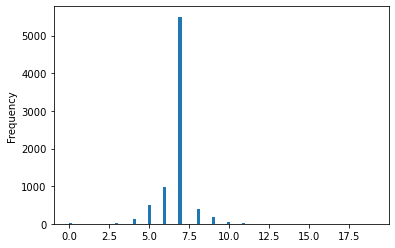

In [ ]:
users['wakeup'].astype('timedelta64[h]').plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

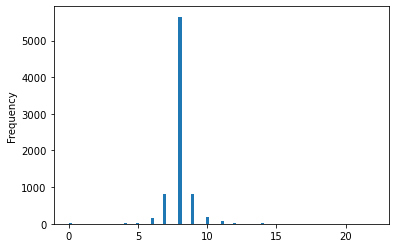

In [ ]:
users['breakfast'].astype('timedelta64[h]').plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

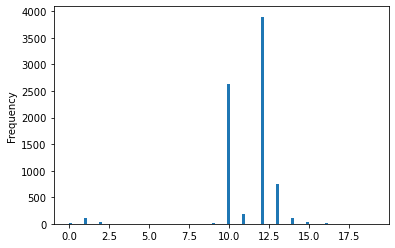

In [ ]:
users['lunch'].astype('timedelta64[h]').plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

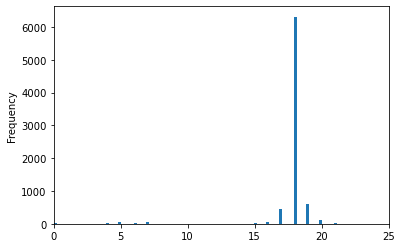

In [ ]:
users['dinner'].astype('timedelta64[h]').plot.hist(bins=100, xlim=(0, 25))

<AxesSubplot:ylabel='Frequency'>

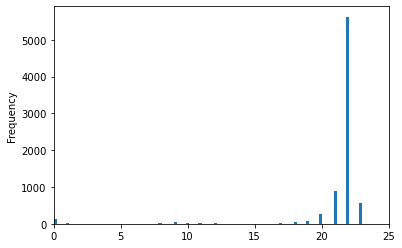

In [ ]:
users['sleep'].astype('timedelta64[h]').plot.hist(bins=100, xlim=(0,25))

In [ ]:
users.disease.value_counts()

000    5320
100     810
111     607
110     357
101     331
001     185
010     120
011      68
          7
Name: disease, dtype: int64

**Preprocessing: change timedelta values to integers & disease to 4 categories (당뇨, 고혈압, 고지혈, None)**

In [ ]:
# change timedelta values to integers (based on 'hour')
users.wakeup = users.wakeup.astype('timedelta64[h]', copy=False)
users.breakfast = users.breakfast.astype('timedelta64[h]', copy=False)
users.lunch = users.lunch.astype('timedelta64[h]', copy=False)
users.dinner = users.dinner.astype('timedelta64[h]', copy=False)
users.sleep = users.sleep.astype('timedelta64[h]', copy=False)

In [ ]:
set(users.disease)

{'', '000', '001', '010', '011', '100', '101', '110', '111'}

In [ ]:
# drop rows that do not have 'disease' value
users['disease'].replace('', np.nan, inplace=True)
users.dropna(subset=['disease'], inplace=True)

In [ ]:
users['disease_label'] = 0
for i in range(users.shape[0]):
    val = users.iloc[i, 6]
    if val[0]=='1':
        users.iloc[i,7] = 1
    elif val[1]=='1':
        users.iloc[i,7] = 2
    elif val[2]=='1':
        users.iloc[i,7] = 3

<ipython-input-164-c2a39e7106a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['disease_label'] = 0
/Users/michelle/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
users

,sex,wakeup,breakfast,lunch,dinner,sleep,disease,disease_label
id,,,,,,,,
125023,2,7.0,8.0,13.0,18.0,23.0,000,0
125024,2,7.0,8.0,13.0,18.0,23.0,000,0
125025,2,7.0,8.0,13.0,18.0,23.0,000,0
125026,2,7.0,8.0,13.0,18.0,23.0,000,0
125027,2,5.0,8.0,13.0,18.0,21.0,000,0
...,...,...,...,...,...,...,...,...
135042,2,7.0,8.0,12.0,18.0,22.0,000,0
135043,2,6.0,7.0,12.0,19.0,21.0,001,3
135046,2,7.0,8.0,12.0,18.0,22.0,111,1


In [ ]:
# preprocessing for kmodes clustering
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
users_preproc = users.drop('disease', axis=1)
users_preproc = users_preproc.apply(le.fit_transform)
users_preproc.head()

,sex,wakeup,breakfast,lunch,dinner,sleep,disease_label
id,,,,,,,
125023,2,7,7,13,18,23,0
125024,2,7,7,13,18,23,0
125025,2,7,7,13,18,23,0
125026,2,7,7,13,18,23,0
125027,2,5,7,13,18,21,0


In [ ]:
users_preproc.tail()

,sex,wakeup,breakfast,lunch,dinner,sleep,disease_label
id,,,,,,,
135042,2,7,7,12,18,22,0
135043,2,6,6,12,19,21,3
135046,2,7,7,12,18,22,1
135047,2,7,7,12,18,22,1
135050,2,7,7,12,18,22,0


#### Using K-Mode with Cao Initialization

In [ ]:
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 3, verbose=1)
fitClusters_cao = km_cao.fit_predict(users_preproc)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 763, cost: 15737.0
Run 1, iteration: 2/100, moves: 1093, cost: 14370.0
Run 1, iteration: 3/100, moves: 626, cost: 14056.0
Run 1, iteration: 4/100, moves: 16, cost: 14056.0


In [ ]:
clusterCentroids = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroids.columns = users_preproc.columns
clusterCentroids

,sex,wakeup,breakfast,lunch,dinner,sleep,disease_label
0,1,7,7,12,18,22,0
1,2,7,8,12,18,21,1
2,2,6,7,13,18,22,1
3,2,7,7,13,18,23,0


#### Using K-Mode with Huang Initialization

In [ ]:
km_huang = KModes(n_clusters=3, init = "Huang", n_init = 3, verbose=1)
fitClusters_huang = km_huang.fit_predict(users_preproc)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1324, cost: 15063.0
Run 1, iteration: 2/100, moves: 208, cost: 15063.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 310, cost: 16019.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1009, cost: 10632.0
Best run was number 3


In [ ]:
clusterCentroids = pd.DataFrame(km_huang.cluster_centroids_)
clusterCentroids.columns = users_preproc.columns
clusterCentroids

,sex,wakeup,breakfast,lunch,dinner,sleep,disease_label
0,2,7,7,12,18,22,0
1,2,7,7,12,18,22,1
2,1,7,7,10,18,22,0


#### Choose K by comparing cost

1. Cao

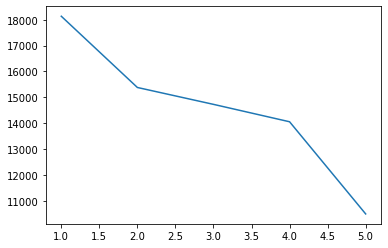

In [ ]:
cost = []
for num_clusters in list(range(1,6)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 3, verbose=0)
    kmode.fit_predict(users_preproc)
    cost.append(kmode.cost_)

y = np.array([i for i in range(1,6,1)])
plt.plot(y, cost)

2. Huang

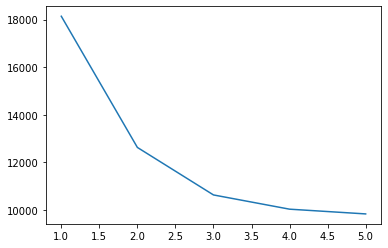

In [ ]:
cost = []
for num_clusters in list(range(1,6)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 3, verbose=0)
    kmode.fit_predict(users_preproc)
    cost.append(kmode.cost_)

y = np.array([i for i in range(1,6,1)])
plt.plot(y, cost)

-> Choose Huang Initialization with K = 3

#### Visualize Results

In [ ]:
users_preproc1 = users_preproc.reset_index()
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['predicted_cluster']
combinedDf = pd.concat([users_preproc1, clustersDf], axis = 1).reset_index()
combinedDf.drop('index', axis=1, inplace=True)
combinedDf.head()

,id,sex,wakeup,breakfast,lunch,dinner,sleep,disease_label,predicted_cluster
0,125023,2,7,7,13,18,23,0,0
1,125024,2,7,7,13,18,23,0,0
2,125025,2,7,7,13,18,23,0,0
3,125026,2,7,7,13,18,23,0,0
4,125027,2,5,7,13,18,21,0,0


In [ ]:
combinedDf.predicted_cluster.value_counts()

0    2906
2    2790
1    2102
Name: predicted_cluster, dtype: int64

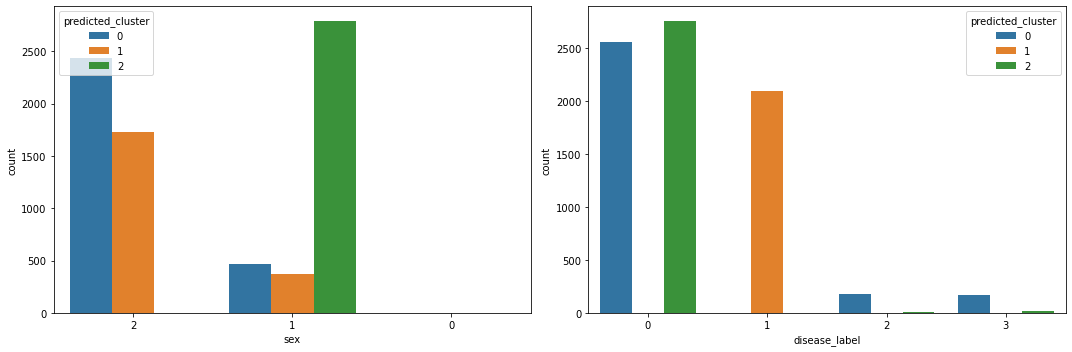

In [ ]:
# Plotting each cluster
f, axs = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x=combinedDf['sex'], order=combinedDf['sex'].value_counts().index, hue=combinedDf['predicted_cluster'], ax=axs[0])
sns.countplot(x=combinedDf['disease_label'], order=combinedDf['disease_label'].value_counts().index, hue=combinedDf['predicted_cluster'], ax=axs[1])
plt.tight_layout()
plt.show()

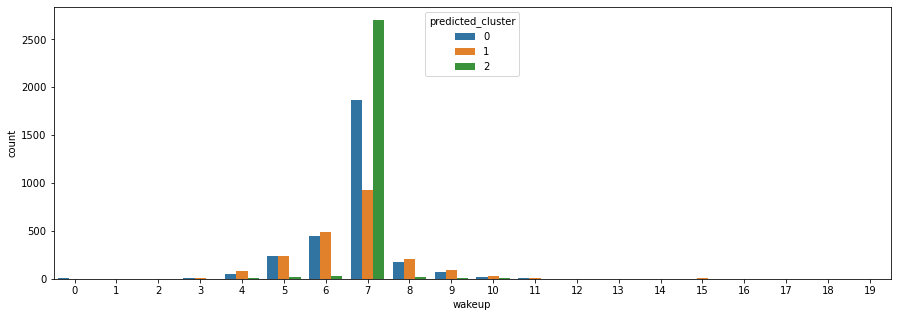

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['wakeup'], hue=combinedDf['predicted_cluster'])
plt.show()

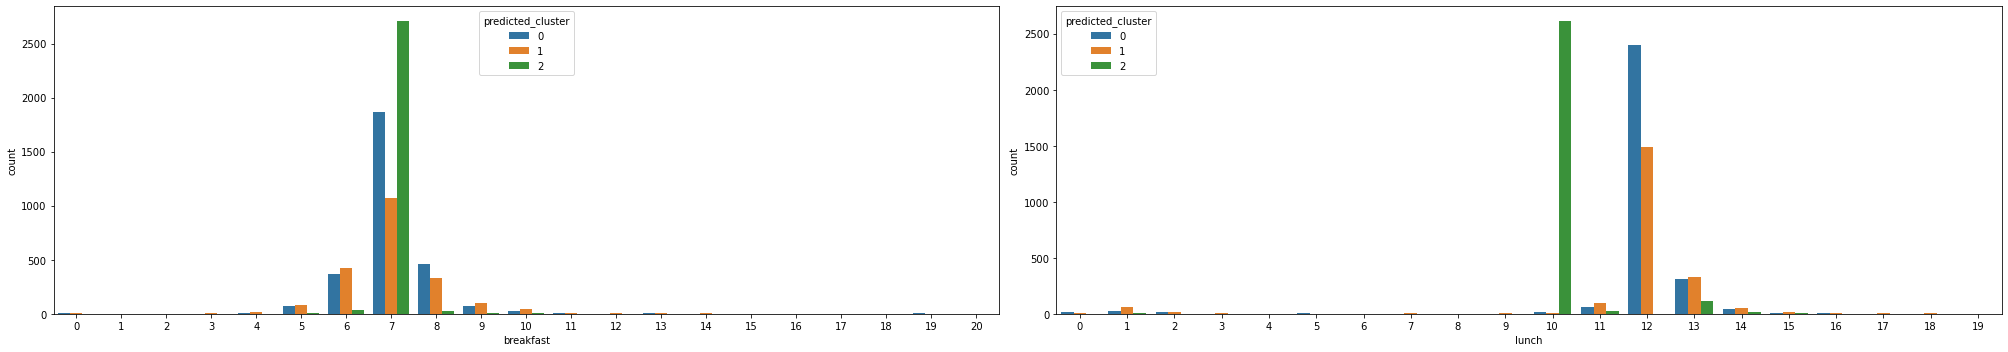

In [ ]:
f, axs = plt.subplots(1, 2, figsize = (28,5))
sns.countplot(x=combinedDf['breakfast'], hue=combinedDf['predicted_cluster'], ax=axs[0])
sns.countplot(x=combinedDf['lunch'], hue=combinedDf['predicted_cluster'], ax=axs[1])
plt.tight_layout()
plt.show()

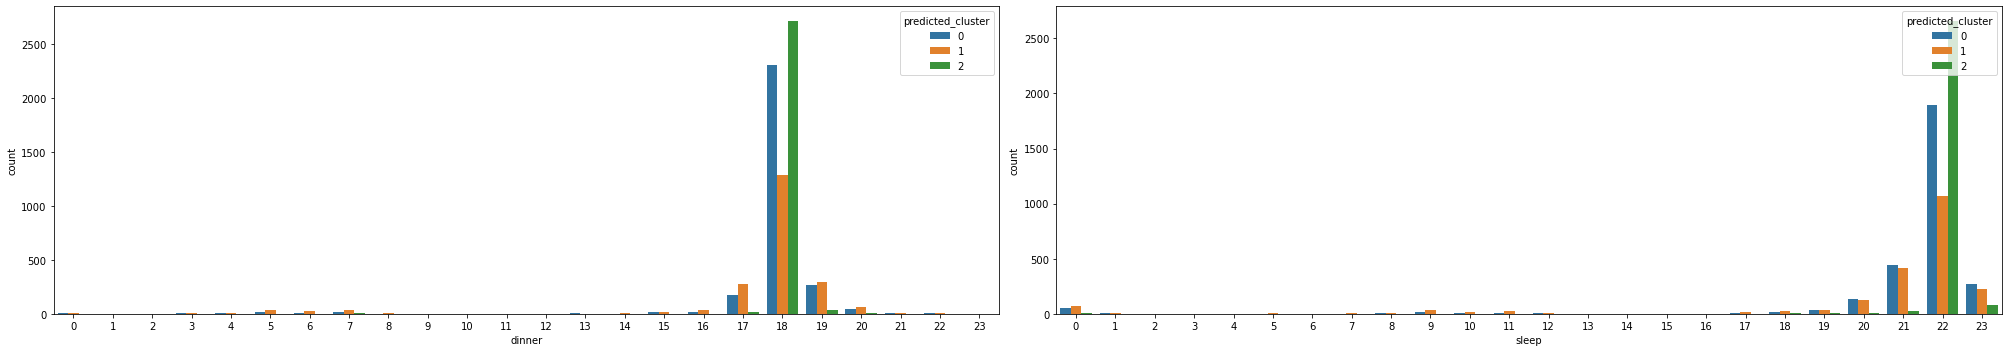

In [ ]:
f, axs = plt.subplots(1, 2, figsize = (28,5))
sns.countplot(x=combinedDf['dinner'], hue=combinedDf['predicted_cluster'], ax=axs[0])
sns.countplot(x=combinedDf['sleep'], hue=combinedDf['predicted_cluster'], ax=axs[1])
plt.tight_layout()
plt.show()

**Memo: active/inactive users를 구분지을 수 있는 분석?**

## 2. log_doll

In [ ]:
drug = pd.read_sql(log_doll_drug, con)
option = pd.read_sql(doll_option, con)
call = pd.read_sql(emergency_call, con)
ear = pd.read_sql(ear_function, con)

In [ ]:
log_doll = 'select * from hyun.log_doll where doll_id = 1'
log = pd.read_sql(log_doll, con)